In [1]:
%matplotlib inline

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles
sklearn.__version__

'0.18.1'

In [22]:
import pandas as pd
df=pd.read_csv('../../data/processed.cleveland.data',na_values={'?':np.nan})
#X.dropna?
df1 = df.apply(pd.to_numeric, args=('coerce',)).dropna()

y = pd.Series(np.where(df1.num>0,1,0),name='target').as_matrix()
X = df1
del X['num']
X=X.as_matrix()
X.shape,y.shape

((297, 13), (297,))

In [23]:
from sklearn.model_selection import train_test_split
#train_test_split?
Xtrain,Xvalid,ytrain,yvalid=train_test_split(X,y)
Xtrain.shape,ytrain.shape,Xvalid.shape,yvalid.shape

((222, 13), (222,), (75, 13), (75,))

In [24]:
from sklearn.metrics import accuracy_score

trainErrorList=[]
validationErrorList=[]

n_estimator_list=range(1,200,10)
for n_estimators in n_estimator_list:
    # Create and fit an AdaBoosted decision tree
    bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                             algorithm="SAMME",
                             n_estimators=n_estimators)

    bdt.fit(Xtrain, ytrain)
    
    yhattrain=bdt.predict(Xtrain)
    yhat_val=bdt.predict(Xvalid)
    
    train_error=1-accuracy_score(yhattrain,ytrain)
    val_error=1-accuracy_score(yhat_val,yvalid)
    
    
    trainErrorList.append(train_error)
    validationErrorList.append(val_error)

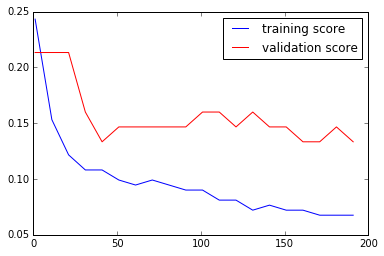

In [25]:
plt.plot(n_estimator_list,trainErrorList,'b',label='training score')
plt.plot(n_estimator_list,validationErrorList,'r',label='validation score');
plt.legend()

In [28]:
from sklearn.model_selection import cross_val_score
trainErrorList=[]
crossvalidationErrorList=[]

n_estimator_list=range(1,200+1,10)
for n_estimators in n_estimator_list:
    print('n_estimators:',n_estimators)
    # Create and fit an AdaBoosted decision tree
    bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                             algorithm="SAMME",
                             n_estimators=n_estimators)
    cv_accuracy=np.mean(cross_val_score(bdt,Xtrain,ytrain,cv=10))
    
    bdt.fit(Xtrain, ytrain)
    yhattrain=bdt.predict(Xtrain)
    yhat_val=bdt.predict(Xvalid)
    
    train_error=1-accuracy_score(yhattrain,ytrain)
    cval_error=1-cv_accuracy
    
    
    trainErrorList.append(train_error)
    crossvalidationErrorList.append(cval_error)

n_estimators: 1
n_estimators: 11
n_estimators: 21
n_estimators: 31
n_estimators: 41
n_estimators: 51
n_estimators: 61
n_estimators: 71
n_estimators: 81
n_estimators: 91
n_estimators: 101
n_estimators: 111
n_estimators: 121
n_estimators: 131
n_estimators: 141
n_estimators: 151
n_estimators: 161
n_estimators: 171
n_estimators: 181
n_estimators: 191


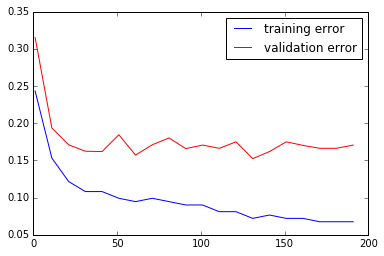

In [30]:
plt.plot(n_estimator_list,trainErrorList,'b',label='training error')
plt.plot(n_estimator_list,crossvalidationErrorList,'r',label='validation error')
plt.legend()